## Initializing and Loading Data

In [1]:
file_location = "../Datasets/TMDB_movie_dataset_v11.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
backup = pd.read_csv(file_location)

### Backup

In [4]:
data = backup.copy(deep=True)

## Initial Data Cleaning

In [5]:
initial = len(data)
before = initial
initial

1140108

### Getting rid of duplicate rows

In [6]:
data = data.drop_duplicates()
after = len(data)
print(f"Removed {(before - after)} duplicate rows. {after} rows left.")
before = after

Removed 368 duplicate rows. 1139740 rows left.


### Removing unreleased movies

The status column shows what stage of production the movie is in. We are only concerned with movies that have been released.

In [7]:
data.status.value_counts()

status
Released           1113554
In Production        10491
Post Production       8218
Planned               6812
Rumored                361
Canceled               304
Name: count, dtype: int64

Getting rid of unreleased movies:

In [8]:
data = data[data['status'] == "Released"]
after = len(data)
print(f"Removed {before - after} unreleased movies. {after} rows left.")
before = after

Removed 26186 unreleased movies. 1113554 rows left.



The release date of some rows are in the future, even though they are marked as `'Released'`. `release_date` is currently an `object` type and needs to be converted to a `datetime` type to be handled.

In [9]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.release_date.describe()

count                           942709
mean     1999-12-19 06:00:05.476133120
min                1800-01-01 00:00:00
25%                1989-02-01 00:00:00
50%                2010-10-06 00:00:00
75%                2018-11-29 00:00:00
max                2061-12-07 00:00:00
Name: release_date, dtype: object

Dropping all movies with a release date in the future:

In [10]:
from datetime import date
today = pd.to_datetime(date.today())
data = data[data['release_date'] < today]
after = len(data)
print(f"Removed {before - after} future movies. {after} rows left.")
before = after

Removed 170978 future movies. 942576 rows left.


In [11]:
data.release_date.describe()

count                           942576
mean     1999-12-17 21:29:43.867189376
min                1800-01-01 00:00:00
25%                1989-01-31 00:00:00
50%                2010-10-04 00:00:00
75%                2018-11-29 00:00:00
max                2024-12-05 00:00:00
Name: release_date, dtype: object

Now the status column can be dropped.

In [12]:
data = data.drop(columns='status')
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

### Removing porn

The `adult` column designates if a row is an adult film. These will be dropped:

In [13]:
data = data[data['adult'] == False]
after = len(data)
print(f"Removed {before - after} adult films. {after} rows left.")
before = after

Removed 94598 adult films. 847978 rows left.


### Getting rid of duplicate IDs

In [14]:
print(f"There are {before - data.id.nunique()} rows with a repeated id.")

There are 7 rows with a repeated id.


Lower indexed entries are more up-to-date and more complete. Removing rows with duplicated IDs, only keeping the first occurance.

In [15]:
data = data.drop_duplicates(subset=['id'], keep='first')
after = len(data)
print(f"Removed {before - after} duplicate IDs. {after} rows left.")
before = after

Removed 7 duplicate IDs. 847971 rows left.


In [16]:
data.id.nunique()

847971

### Dropping unusable columns

Checking columns:

In [17]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

In [18]:
data[['backdrop_path', 'homepage', 'poster_path']].describe()

,backdrop_path,homepage,poster_path
count,259861,102253,635067
unique,257702,96476,631511
top,/3CxwYgqGtJ6UEGfWUT0gMYCIlFP.jpg,https://animation.geidai.ac.jp,/wtoKLMm4UvkwvcSwO3XWcs1gJuF.jpg
freq,157,147,54


The `backdrop_path`, `homepage`, and `poster_path` columns do not contain any useful data. These can be dropped.

In [19]:
data = data.drop(columns=['backdrop_path', 'homepage', 'poster_path'])
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Analyzing Columns

In [20]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

### `title`

In [21]:
data.title.describe()

count     847967
unique    729304
top         Home
freq         130
Name: title, dtype: object

In [22]:
data['title'].sample(5)

534655                      蛇淫
1108671         Cheating Wives
287567          Text Videovoid
159408     The Day Christ Died
110910         Love & Savagery
Name: title, dtype: object

### `vote_average`

In [23]:
data.vote_average.describe()

count    847971.000000
mean          2.286496
std           3.141265
min           0.000000
25%           0.000000
50%           0.000000
75%           5.341000
max          10.000000
Name: vote_average, dtype: float64

<Axes: ylabel='Frequency'>

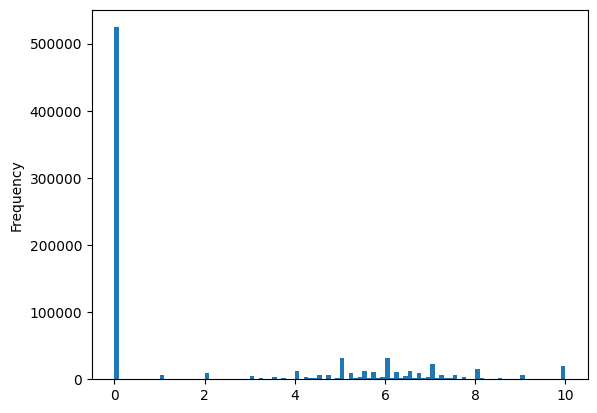

In [24]:
data.vote_average.plot.hist(bins=100)

There are an overwhelmingly large amount of $0.0$ vote averages. This is because they have $0$ `vote_count`. It's inappropriate to consider a movie with no votes to be $0.0$ on a $1\text{-}10$ scale that does not permit $0$. These should be replaced with `NaN`.

<Axes: ylabel='Frequency'>

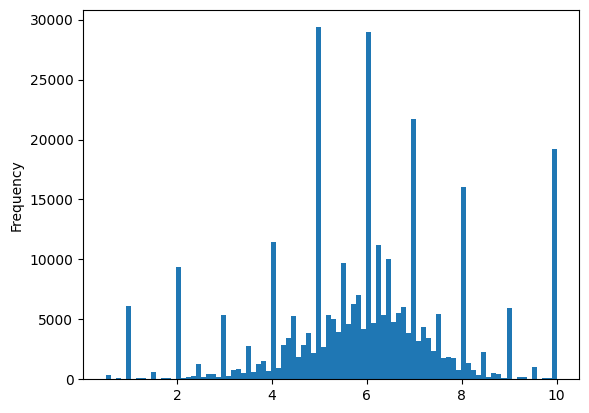

In [25]:
data.vote_average = data.vote_average.replace(0, np.nan)
data.vote_average.plot.hist(bins=90)

In [26]:
scoredNoVotes = data.query('vote_count == 0 and vote_average != 0')
print(f"Amount of movies with no votes but have a vote average anyway: {len(scoredNoVotes)}")
scoredNoVotes.sample()

Amount of movies with no votes but have a vote average anyway: 524046


,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
522697,1018119,Clara et son juge,NaN,0,1997-03-17,0,95,False,0,tt0220365,fr,Clara et son juge,"Judge Larcher, who has lost his wife and child...",0.6,NaN,"Comedy, Drama",NaN,France,French,NaN


There are some movies with $0$ `vote_count` but with a real `vote_average`.

### `vote_count`

In [27]:
data.vote_count.describe()

count    847971.000000
mean         25.243428
std         368.542900
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       34495.000000
Name: vote_count, dtype: float64

<Axes: ylabel='Frequency'>

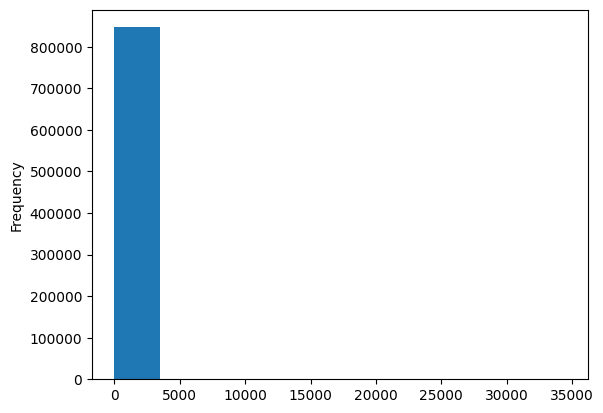

In [28]:
data.vote_count.plot.hist()

Most movies only have a handful of votes, while others can have tens of thousands.

### `release_date`

In [29]:
type(data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: >

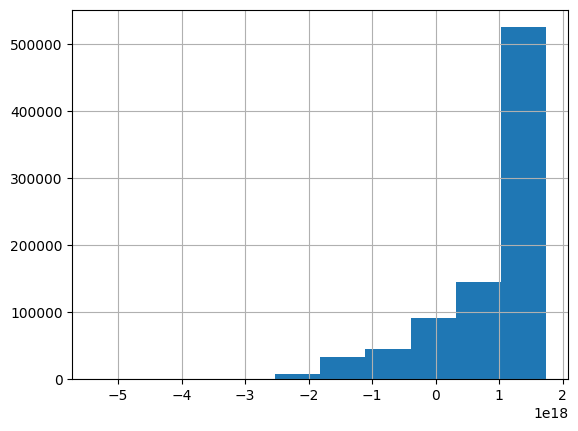

In [30]:
pd.to_numeric(data['release_date']).hist()

As expected the majority of movies are recent.

In [31]:
data[data['release_date'] == data['release_date'].min()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
583141,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.6,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN


There are movies with improperly recorded dates.

In [32]:
data[data['release_date'] < pd.to_datetime('1900-01-01')].sort_values('release_date').head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
583141,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.600,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN
567812,1233885,A Farsa de Inês Pereira,NaN,0,1800-09-11,0,56,False,0,NaN,pt,A Farsa de Inês Pereira,The farsades of ines pereira by the goat of my...,0.600,NaN,NaN,NaN,NaN,Portuguese,NaN
540414,1314804,Kaskisavun mailta,NaN,0,1837-10-29,0,14,False,0,NaN,en,Kaskisavun mailta,Finnish short documentary,0.651,NaN,NaN,NaN,Finland,Finnish,NaN
611979,1256924,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,NaN,en,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.000,The frames that spun!,NaN,NaN,NaN,NaN,NaN
534500,1244969,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,tt31150469,fr,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.600,NaN,Documentary,Paris Nadar Studio,NaN,No Language,NaN


Luckily there are only a handful of these. The first legitimate film is in 1865, anything claiming to be older will be removed.

In [33]:
data = data[data['release_date'] >= pd.to_datetime('1865-01-01')]

### `revenue`

In [34]:
data.revenue.describe()

count    8.479680e+05
mean     8.733336e+05
std      1.958223e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+09
Name: revenue, dtype: float64

In [35]:
data.revenue.info()

<class 'pandas.core.series.Series'>
Index: 847968 entries, 0 to 1140105
Series name: revenue
Non-Null Count   Dtype
--------------   -----
847968 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [36]:
revenue_sorted = data.sort_values('revenue')
revenue_sorted.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
196266,339294,Some Bears,7.0,2,2013-05-15,-12,8,False,12,NaN,en,Some Bears,A young man slips into a world of delusion aft...,0.600,"Bears, known in the wild for their cuddliness",NaN,NaN,United States of America,English,NaN
106513,197955,Tarok,5.0,6,2013-10-30,0,135,False,4800000,tt3263178,da,Tarok,A family saga spanning three decades based on ...,1.009,Follow Your Dreams While You Can,Drama,Regner Grasten Film,Denmark,Danish,woman director
1140071,734843,Oh that's bhanu,NaN,0,2019-10-17,0,112,False,0,NaN,en,Oh that's bhanu,"Bhanumathi Rao, in her younger days, was a dan...",0.602,a film by R. V. Ramani,NaN,NaN,NaN,NaN,NaN
1140072,734845,Sasha Seeking Talents,NaN,0,2020-08-21,0,13,False,0,NaN,ru,Саша ищет таланты,Blogger Sasha makes a video about Mikhail. The...,0.626,NaN,Comedy,NaN,Russia,NaN,short film
1140073,734846,Свидание,NaN,0,2019-08-01,0,0,False,0,NaN,ru,Свидание,NaN,0.600,NaN,NaN,NaN,NaN,Russian,NaN


In [37]:
revenue_sorted.tail()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
282,76600,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,192,False,460000000,tt1630029,en,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,"dying and death, loss of loved one, alien life..."
15,299534,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,181,False,356000000,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac..."
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
230038,1270893,TikTok Rizz Party,10.000,1,2024-04-01,3000000000,180,False,250000000,NaN,en,TikTok Rizz Party,"a band of brothers, torn apart by the constant...",0.000,NaN,"Drama, Comedy",Warner Bros.,United States of America,NaN,"party, tiktok, rizz"
554324,1224207,Adventures in Bora Bora,NaN,0,2023-08-23,3000000000,5,False,800000000,NaN,en,Adventures in Bora Bora,"The adventures in Bora Bora, is an astonishing...",0.000,(English),"Horror, War",NaN,NaN,English,NaN


Most films have no revenue, but there are many highly grossing films.

### `runtime`

In [38]:
data.runtime.describe()

count    847968.000000
mean         48.080396
std          59.383437
min           0.000000
25%           3.000000
50%          30.000000
75%          88.000000
max       14400.000000
Name: runtime, dtype: float64

In [39]:
data.runtime.info()

<class 'pandas.core.series.Series'>
Index: 847968 entries, 0 to 1140105
Series name: runtime
Non-Null Count   Dtype
--------------   -----
847968 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [40]:
zero_runtime = data[data['runtime'] == 0]
print(f"There are {len(zero_runtime)} movies with zero runtime.")

There are 186005 movies with zero runtime.


Many movies have their runtime listed as zero. These will be considered missing data.

In [41]:
data.runtime = data.runtime.replace(0, np.nan)

<Axes: ylabel='Frequency'>

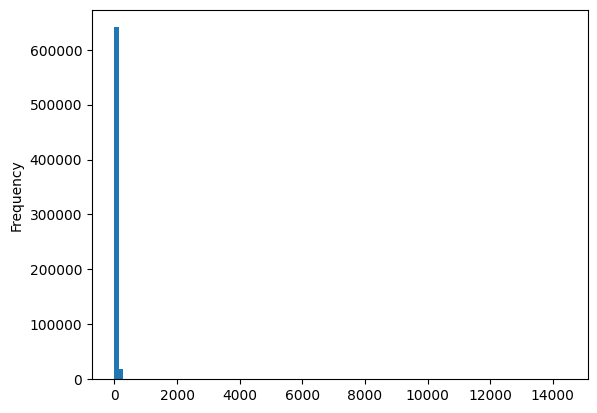

In [42]:
data.runtime.plot.hist(bins=100)

There are a few strong outliers.

<Axes: ylabel='Frequency'>

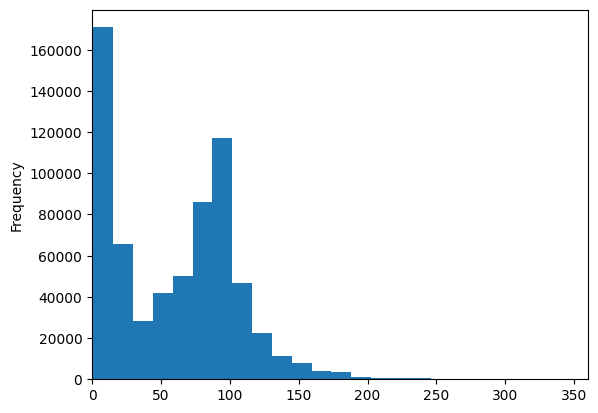

In [43]:
data.runtime.plot.hist(bins=1000, xlim=(0, 360))

### `budget`

In [44]:
data.budget.describe()

count    8.479680e+05
mean     3.324304e+05
std      5.222676e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.880000e+08
Name: budget, dtype: float64

In [45]:
data.budget.info()

<class 'pandas.core.series.Series'>
Index: 847968 entries, 0 to 1140105
Series name: budget
Non-Null Count   Dtype
--------------   -----
847968 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


<Axes: >

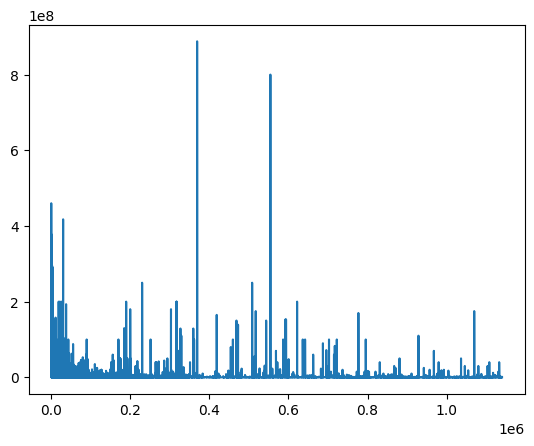

In [46]:
data.budget.plot()

## `imdb_id`

In [47]:
data.imdb_id.describe()

count         526562
unique        526239
top       tt32094375
freq              22
Name: imdb_id, dtype: object

There are some rows with duplicate IMDB IDs.

In [48]:
data[data.imdb_id.duplicated()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
5531,836466,Return,6.291,619,2020-06-10,0,12.0,False,0,NaN,en,Return,A single man has worked most of his life in a ...,7.915,NaN,Animation,NaN,NaN,NaN,NaN
7425,1040330,Black Adam: Saviour or Destroyer?,6.998,404,2022-10-15,0,22.0,False,0,NaN,en,Black Adam: Saviour or Destroyer?,Ahead of the release of upcoming fantasy film ...,10.918,NaN,Documentary,NaN,NaN,English,behind the scenes
8870,665399,BTS World Tour: Love Yourself - Japan Edition,9.172,306,2019-10-09,0,231.0,False,0,NaN,ko,BTS World Tour: Love Yourself - Japan Edition,BTS perform their Japan concert at Tokyo Dome ...,4.892,NaN,"Music, Documentary",Big Hit Entertainment,South Korea,Korean,"making of, concert film, choreography"
11155,1086372,Return,6.599,217,1972-07-02,0,82.0,False,0,NaN,hy,Return,The main character of the film is an outstandi...,4.835,NaN,NaN,NaN,NaN,NaN,NaN
11301,15257,Hulk vs. Wolverine,7.099,213,2009-01-27,0,38.0,False,0,NaN,en,Hulk vs. Wolverine,Department H sends in Wolverine to track down ...,14.562,NaN,"Animation, Action, Science Fiction, Adventure,...","Lionsgate, Marvel Animation",United States of America,English,"superhero, mutant, based on comic, norse mytho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140100,734797,Yui Ogura 1st Live Tour High-Touch☆Summer,NaN,0,2017-02-08,0,136.0,False,0,NaN,en,Yui Ogura 1st Live Tour High-Touch☆Summer,This is the first solo live tour for popular v...,0.600,Yui Ogura 1st Live Tour,NaN,NaN,NaN,Japanese,NaN
1140101,734799,Girls' School,NaN,0,1982-01-01,0,91.0,False,0,NaN,zh,Nu zi xue jiao,Also known as Girls' School.,0.840,NaN,NaN,NaN,NaN,NaN,"teen movie, relationship, female sexuality, queer"
1140103,734803,Lines,NaN,0,2017-01-01,0,10.0,False,0,NaN,en,Lines,Richard Garet’s moving image work is character...,0.600,NaN,NaN,NaN,NaN,NaN,NaN
1140104,734804,Studio Moments,NaN,0,2020-01-01,0,8.0,False,0,NaN,en,Studio Moments,"A ""moving image"" work by Richard Garet with mu...",0.600,NaN,NaN,NaN,NaN,NaN,NaN


These are all rows with missing IMDB IDs. They will be dropped.

In [49]:
data = data.drop_duplicates(subset=['imdb_id'])

In [50]:
data.imdb_id.describe()

count        526239
unique       526239
top       tt3281206
freq              1
Name: imdb_id, dtype: object

In [51]:
data.imdb_id.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: imdb_id
Non-Null Count   Dtype 
--------------   ----- 
526239 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `original_language`

In [52]:
data.original_language.describe()

count     526240
unique       162
top           en
freq      268515
Name: original_language, dtype: object

In [53]:
data.original_language.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: original_language
Non-Null Count   Dtype 
--------------   ----- 
526240 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


<Axes: ylabel='count'>

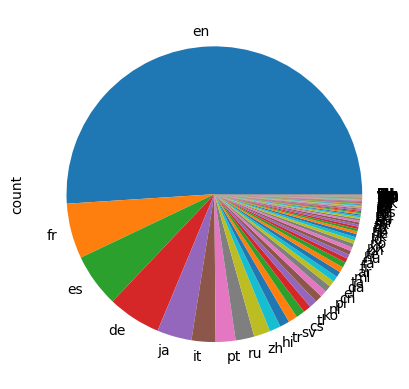

In [54]:
data.original_language.value_counts().plot.pie()

## `original_title`

In [55]:
data.original_title.describe()

count     526240
unique    474135
top         Home
freq          50
Name: original_title, dtype: object

In [56]:
data.original_title.sample(5)

554510                        筑豊のこどもたち
466354                 Breaking Social
895368    Kasal-Kasalan, Bahay-Bahayan
713348                          Espejo
35968                        The Badge
Name: original_title, dtype: object

In [57]:
data.original_title.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: original_title
Non-Null Count   Dtype 
--------------   ----- 
526240 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `overview`

In [58]:
data.overview.describe()

count                   462154
unique                  456124
top       Mexican feature film
freq                       897
Name: overview, dtype: object

In [59]:
data.overview.sample(5)

226356    As darkness fell on May 10, 1996, a fast movin...
201871    All the qualified men line up to be chosen, as...
148173    The story of one of the most important Brazili...
854295    Pra Quem Fica, Tchau tells the story of a teen...
899365    A domineering,reclusive, and ostentatiously pi...
Name: overview, dtype: object

In [60]:
data.overview.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: overview
Non-Null Count   Dtype 
--------------   ----- 
462154 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `popularity`

In [61]:
data.popularity.describe()

count    526240.000000
mean          1.935579
std          10.313819
min           0.000000
25%           0.600000
50%           0.710000
75%           1.400000
max        2994.357000
Name: popularity, dtype: float64

In [62]:
data.popularity.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: popularity
Non-Null Count   Dtype  
--------------   -----  
526240 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


<Axes: >

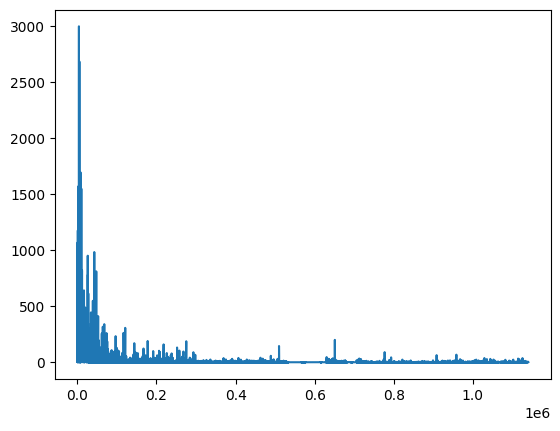

In [63]:
data.popularity.plot()

## `tagline`

In [64]:
data.tagline.describe()

count                     94968
unique                    93541
top       Based on a true story
freq                         24
Name: tagline, dtype: object

In [65]:
data.tagline.sample(5)

167409                           NaN
323971    From the ashes, evil rises
248688                           NaN
453865                           NaN
839341                           NaN
Name: tagline, dtype: object

In [66]:
data.tagline.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: tagline
Non-Null Count  Dtype 
--------------  ----- 
94968 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `genres`

In [67]:
data.genres.describe()

count     429692
unique     10916
top        Drama
freq       74730
Name: genres, dtype: object

The genres in the `genre` column are all in one string. They need to be split up to be own their own.

In [68]:
data.genres = data.genres.apply(lambda genres: [genre.strip() for genre in genres.split(',')] if isinstance(genres, str) else genres)

Now the genres are lists.

In [69]:
data.genres.describe()

count      429692
unique      10916
top       [Drama]
freq        74730
Name: genres, dtype: object

In [70]:
data.genres.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: genres
Non-Null Count   Dtype 
--------------   ----- 
429692 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [71]:
genre_list = data.genres.explode()
genre_list.unique()

array(['Action', 'Science Fiction', 'Adventure', 'Drama', 'Crime',
       'Thriller', 'Fantasy', 'Comedy', 'Romance', 'Western', 'Mystery',
       'War', 'Animation', 'Family', 'Horror', 'Music', 'History',
       'TV Movie', 'Documentary', nan], dtype=object)

<Axes: ylabel='count'>

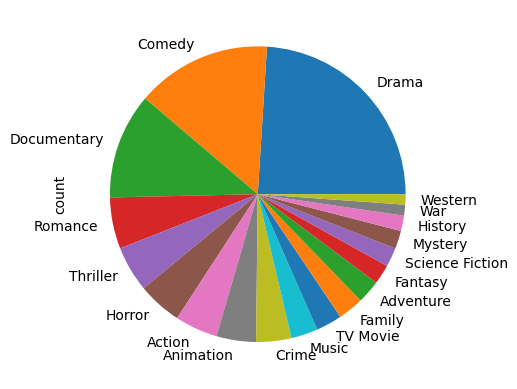

In [72]:
genre_list.value_counts().plot.pie()

## `production_companies`

In [73]:
data.production_companies.describe()

count                  303692
unique                 151054
top       Metro-Goldwyn-Mayer
freq                     2025
Name: production_companies, dtype: object

In [74]:
data.production_companies.sample(5)

175603           Magic Hour Pictures
507636                           NaN
60907             RKO Radio Pictures
327177    Total Nonstop Action (TNA)
35919                            BKM
Name: production_companies, dtype: object

The production companies in the `production_companies` column are all in one string. They need to be split up to be own their own.

In [75]:
data.production_companies = data.production_companies.apply(lambda companies_list: [company.strip() for company in companies_list.split(',')] if isinstance(companies_list, str) else companies_list)


Now the companies are in lists.

In [76]:
data.production_companies.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: production_companies
Non-Null Count   Dtype 
--------------   ----- 
303692 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [77]:
companies = data.production_companies.explode()
companies.unique()

array(['Legendary Pictures', 'Syncopy', 'Warner Bros. Pictures', ...,
       'Encounter Studios', 'Sky Blue Productions',
       "Les Vues de l'Esprit"], dtype=object)

In [78]:
len(companies.unique())

120137

## `production_countries`

In [79]:
data.production_countries.describe()

count                       386676
unique                        8753
top       United States of America
freq                        107559
Name: production_countries, dtype: object

In [80]:
data.production_countries.sample(5)

197907                         NaN
98139               United Kingdom
822332    United States of America
122444    United States of America
158079                   Hong Kong
Name: production_countries, dtype: object

The countries in the `production_countries` column are all in one string. They need to be split up on their own.

In [81]:
data.production_countries = data.production_countries.apply(lambda countries_list: [country.strip() for country in countries_list.split(',')] if isinstance(countries_list, str) else countries_list)

Now the countries are in lists.

In [82]:
data.production_countries.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: production_countries
Non-Null Count   Dtype 
--------------   ----- 
386676 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [83]:
countries = data.production_countries.explode()
countries.unique()

array(['United Kingdom', 'United States of America', 'Canada',
       'New Zealand', 'Australia', 'South Africa', 'France', 'Germany',
       'Hong Kong', 'Taiwan', 'India', 'South Korea', 'Netherlands',
       'Japan', 'China', 'Malta', 'Bulgaria', 'Hungary', 'Mexico',
       'Spain', 'Italy', 'Brazil', 'Czech Republic',
       'United Arab Emirates', 'Switzerland', 'Belgium', 'Ireland',
       'Poland', 'Denmark', 'Russia', 'Norway', 'Sweden', 'Slovenia',
       'Romania', 'Greece', nan, 'Colombia', 'Iceland', 'Turkey',
       'Philippines', 'Luxembourg', 'Austria', 'Morocco', 'Finland',
       'Israel', 'Portugal', 'Indonesia', 'Thailand', 'Argentina',
       'Chile', 'Serbia', 'Solomon Islands', 'Dominican Republic',
       'Guadaloupe', 'Peru', 'Soviet Union', 'Slovakia', 'Puerto Rico',
       'Uruguay', 'Paraguay', 'Ghana', 'Iran', 'Cyprus', 'Lebanon',
       'Qatar', 'Malawi', 'Singapore', 'Malaysia', 'Botswana',
       'Venezuela', 'Czechoslovakia', 'Iraq', 'Yugoslavia', 'Macao

In [84]:
countries

0                    United Kingdom
0          United States of America
1                    United Kingdom
1          United States of America
2                    United Kingdom
                     ...           
1140084                     Germany
1140085                      Canada
1140089                         NaN
1140090                         NaN
1140091                         NaN
Name: production_countries, Length: 577387, dtype: object

<Axes: ylabel='count'>

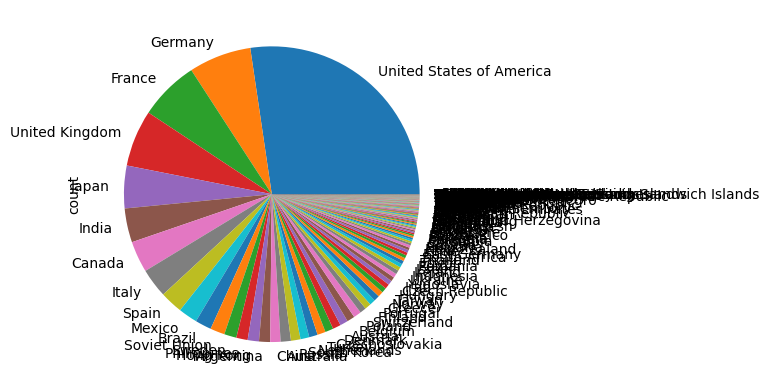

In [85]:
countries.value_counts().plot.pie()

## `spoken_languages`

In [86]:
data.spoken_languages.describe()

count      387952
unique       6207
top       English
freq       137338
Name: spoken_languages, dtype: object

In [87]:
data.spoken_languages.sample(5)

319794        Spanish
655878    No Language
273109        English
111469            NaN
337179         French
Name: spoken_languages, dtype: object

The languages in the `spoken_languages` column are in strings. They need to be split up.

In [88]:
data.spoken_languages = data.spoken_languages.apply(lambda languages_list: [language.strip() for language in languages_list.split(',')] if isinstance(languages_list, str) else languages_list)

In [89]:
data.spoken_languages.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: spoken_languages
Non-Null Count   Dtype 
--------------   ----- 
387952 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [90]:
languages = data.spoken_languages.explode()
languages.unique()

array(['English', 'French', 'Japanese', 'Swahili', 'Mandarin', 'Spanish',
       'Hindi', 'Russian', 'Xhosa', 'Persian', 'Urdu', 'Arabic', 'German',
       'Swedish', 'Italian', 'Romanian', 'Korean', 'Norwegian', 'Latin',
       'Tagalog', 'Hungarian', 'Cantonese', 'Turkish', 'Greek', 'Malay',
       'Czech', 'Polish', 'Hebrew', 'Dutch', 'Vietnamese', 'Yiddish',
       'Tamil', 'Finnish', 'Somali', 'Nepali', 'Tibetan', 'Portuguese',
       'Gaelic', 'Albanian', 'Thai', 'Indonesian', 'Danish', 'Irish',
       'Estonian', 'Afrikaans', 'Chichewa; Nyanja', 'Sotho', 'Zulu',
       'Sinhalese', 'Khmer', 'Bulgarian', 'Icelandic', 'Samoan',
       'Bengali', 'Esperanto', 'Haitian; Haitian Creole', 'Ukrainian',
       'Breton', 'Croatian', 'Inuktitut', 'Armenian', 'Sanskrit',
       'Georgian', 'Pushto', 'Burmese', 'Northern Sami', 'Slovak',
       'Quechua', 'Navajo', 'No Language', 'Serbian', 'Serbo-Croatian',
       'Welsh', 'Moldavian', nan, 'Cornish', 'Lithuanian', 'Fulah',
       'Punjabi

<Axes: ylabel='count'>

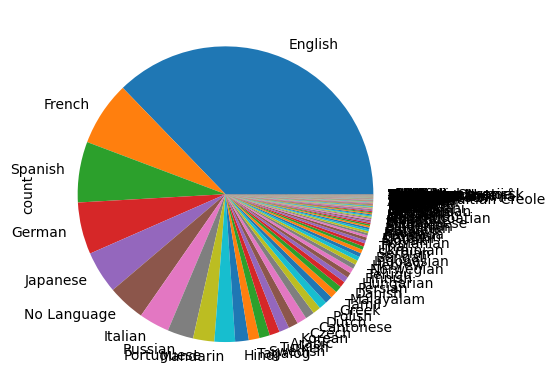

In [91]:
languages.value_counts().plot.pie()

## `keywords`


In [92]:
data.keywords.describe()

count             187192
unique            121866
top       woman director
freq                7301
Name: keywords, dtype: object

In [93]:
data.keywords.sample(5)

717117    slasher, kill count, horror comedy, edmonton, ...
790162                                    prison, parenting
874242                                cave, treasure hunter
782930                                                  NaN
112245                                                  NaN
Name: keywords, dtype: object

The keywords in the `keywords` column are all in one string. They need to be split up.

In [94]:
data.keywords = data.keywords.apply(lambda keywords_list: [keyword.strip() for keyword in keywords_list.split(',')] if isinstance(keywords_list, str) else keywords_list)

In [95]:
data.keywords.info()

<class 'pandas.core.series.Series'>
Index: 526240 entries, 0 to 1140091
Series name: keywords
Non-Null Count   Dtype 
--------------   ----- 
187192 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [96]:
keywords = data.keywords.explode()
keywords.unique()

array(['rescue', 'mission', 'dream', ..., 'bhajarangi', 'tapalin',
       'ice breaker'], dtype=object)

In [97]:
keywords.value_counts()

keywords
short film                18295
woman director            13881
based on novel or book     5632
murder                     4410
lgbt                       3958
                          ...  
seri indians                  1
bhajarangi                    1
ske48                         1
edgewood                      1
قاسم الملاك                   1
Name: count, Length: 41986, dtype: int64

## Exporting

In [98]:
data.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,5.262400e+05,280489.000000,526240.000000,526240,5.262400e+05,442204.000000,5.262400e+05,526240.000000
mean,5.278728e+05,5.812233,40.529502,1993-04-14 02:34:33.584675968,1.356445e+06,70.050970,5.229953e+05,1.935579
min,2.000000e+00,0.500000,0.000000,1865-01-01 00:00:00,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,2.568688e+05,5.000000,0.000000,1976-06-26 00:00:00,0.000000e+00,26.000000,0.000000e+00,0.600000
50%,4.770170e+05,6.000000,1.000000,2005-05-20 00:00:00,0.000000e+00,81.000000,0.000000e+00,0.710000
75%,7.729982e+05,6.915000,4.000000,2016-05-20 00:00:00,0.000000e+00,96.000000,0.000000e+00,1.400000
max,1.395476e+06,10.000000,34495.000000,2024-12-01 00:00:00,2.923706e+09,14400.000000,8.880000e+08,2994.357000
std,3.493395e+05,1.774119,467.166819,NaN,2.359956e+07,59.819531,6.431701e+06,10.313819


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526240 entries, 0 to 1140091
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    526240 non-null  int64         
 1   title                 526240 non-null  object        
 2   vote_average          280489 non-null  float64       
 3   vote_count            526240 non-null  int64         
 4   release_date          526240 non-null  datetime64[ns]
 5   revenue               526240 non-null  int64         
 6   runtime               442204 non-null  float64       
 7   adult                 526240 non-null  bool          
 8   budget                526240 non-null  int64         
 9   imdb_id               526239 non-null  object        
 10  original_language     526240 non-null  object        
 11  original_title        526240 non-null  object        
 12  overview              462154 non-null  object        
 13  pop

In [100]:
data.to_csv('../Datasets/clean.csv')